In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris
import pandas as pd

In [92]:
penguins = sns.load_dataset('penguins')

In [93]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [61]:
np.unique(penguins['species'].values)

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [38]:
palette1 = {'Adelie': 'pink', 'Chinstrap': 'red', 'Gentoo': 'black'}

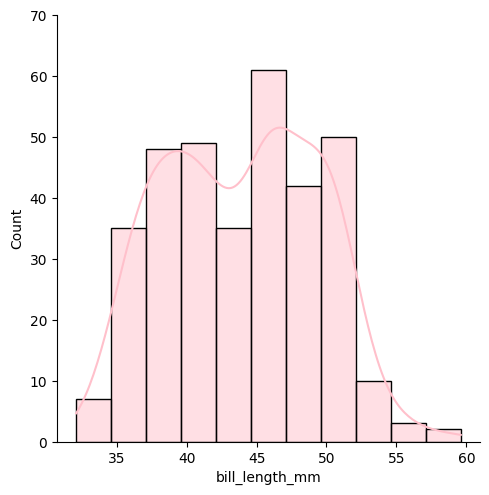

In [39]:
plot=sns.displot(data=penguins, x='bill_length_mm', color='pink',kde=True)
plot.set_yticklabels(rotation=0)
plot

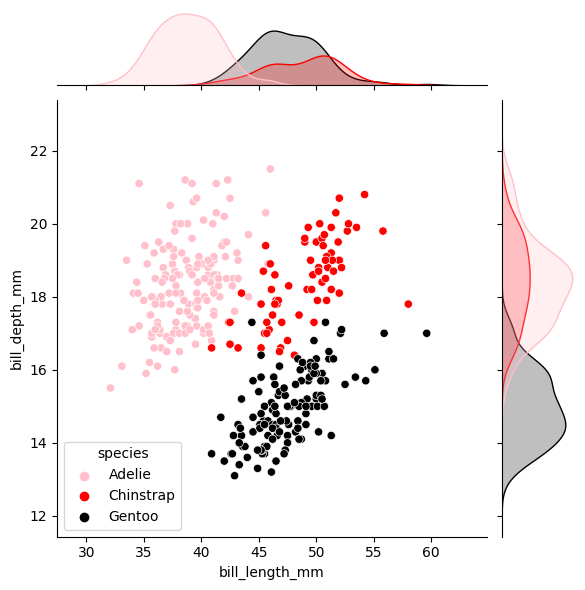

In [40]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=palette1)

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

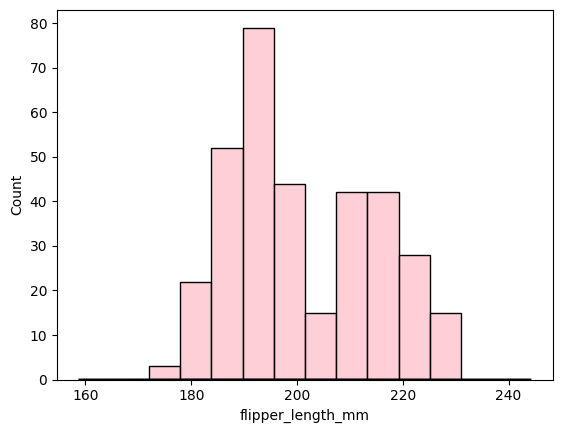

In [41]:
sns.histplot(data=penguins, x='flipper_length_mm', color='pink')
sns.kdeplot(data=penguins, x='flipper_length_mm', color='black')


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

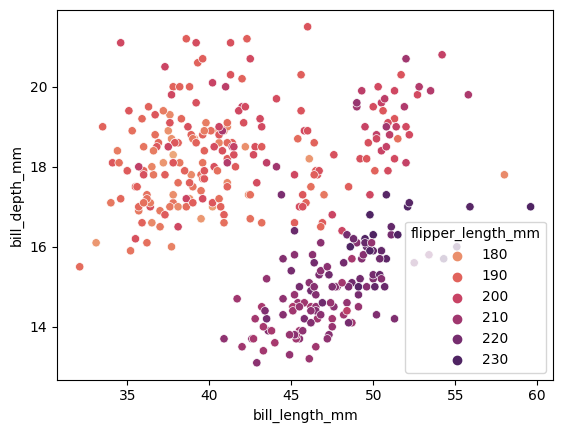

In [42]:
temp_color=sns.color_palette("flare", as_cmap=True)
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='flipper_length_mm', palette=temp_color)

<ipython-input-43-15cb7b461df2>:2: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", palette=temp_color)


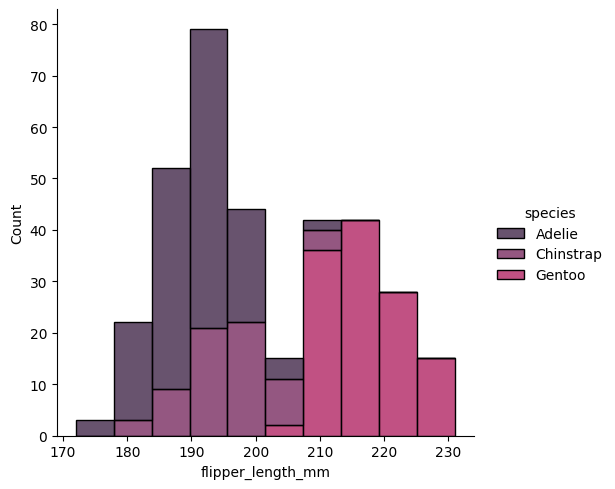

In [43]:
temp_color=sns.color_palette("rocket")
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", palette=temp_color)

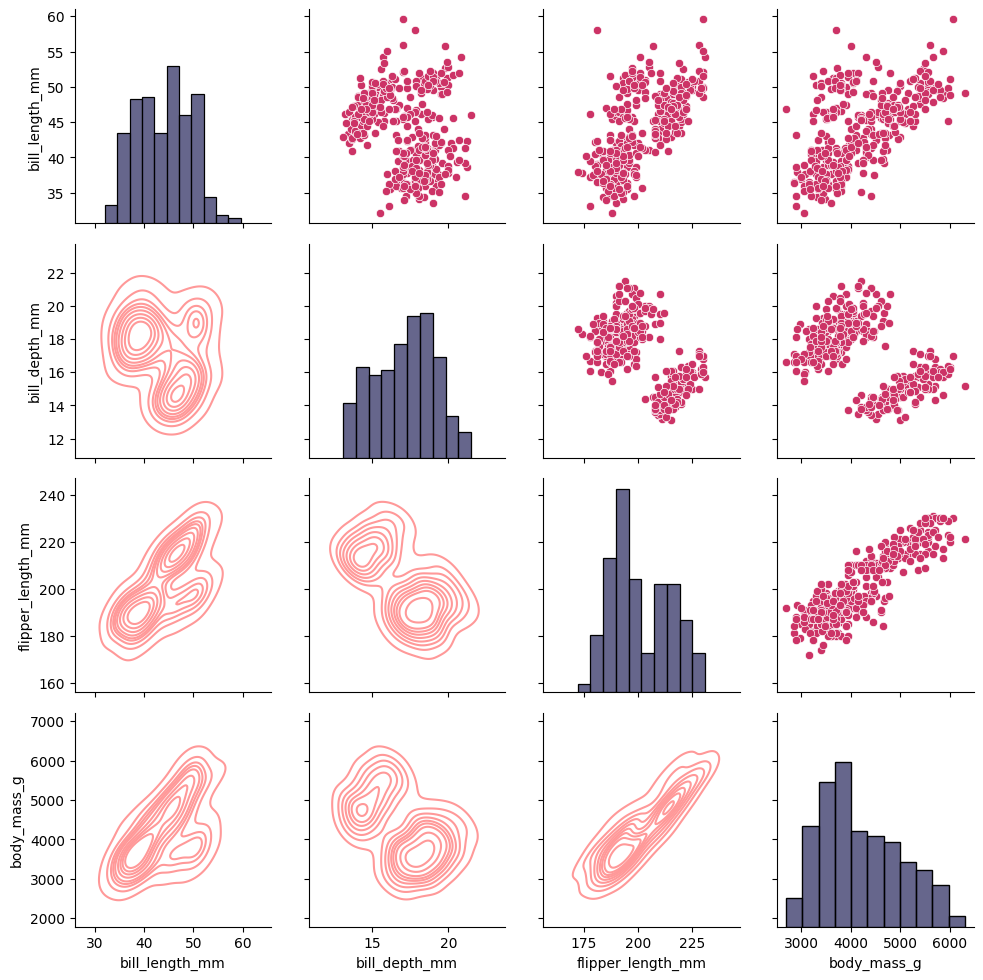

In [44]:
test_color=sns.color_palette("rocket")
g=sns.PairGrid(data=penguins, vars=penguins.columns[2:6])
g.map_upper(sns.scatterplot, color='#CC3366')
g.map_lower(sns.kdeplot, color='#FF9999')
g.map_diag(sns.histplot, color='#333366')

In [45]:
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean())


In [46]:
col_drop=['species',	'island', 'sex', 'body_mass_g']
g=penguins.drop(col_drop, axis=1)

<Axes: ylabel='Density'>

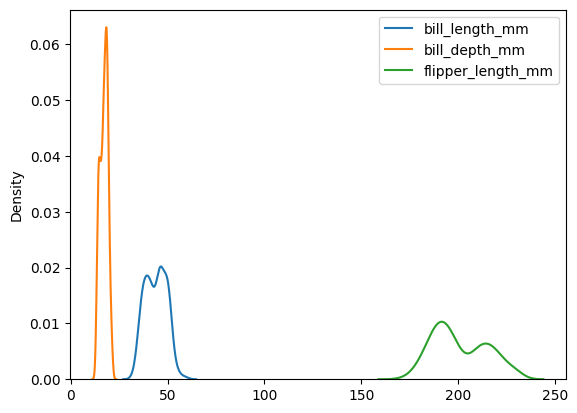

In [47]:
sns.kdeplot(data=g)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

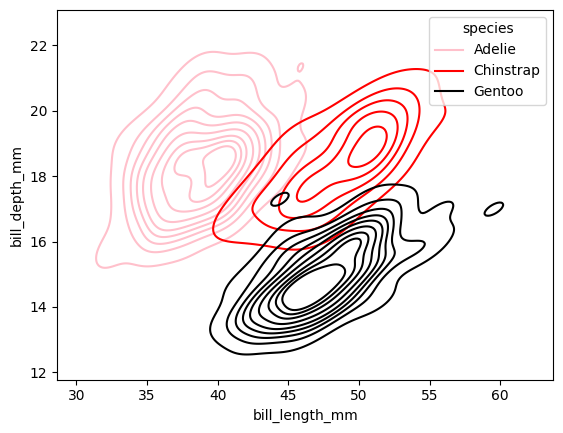

In [48]:
sns.kdeplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=palette1)

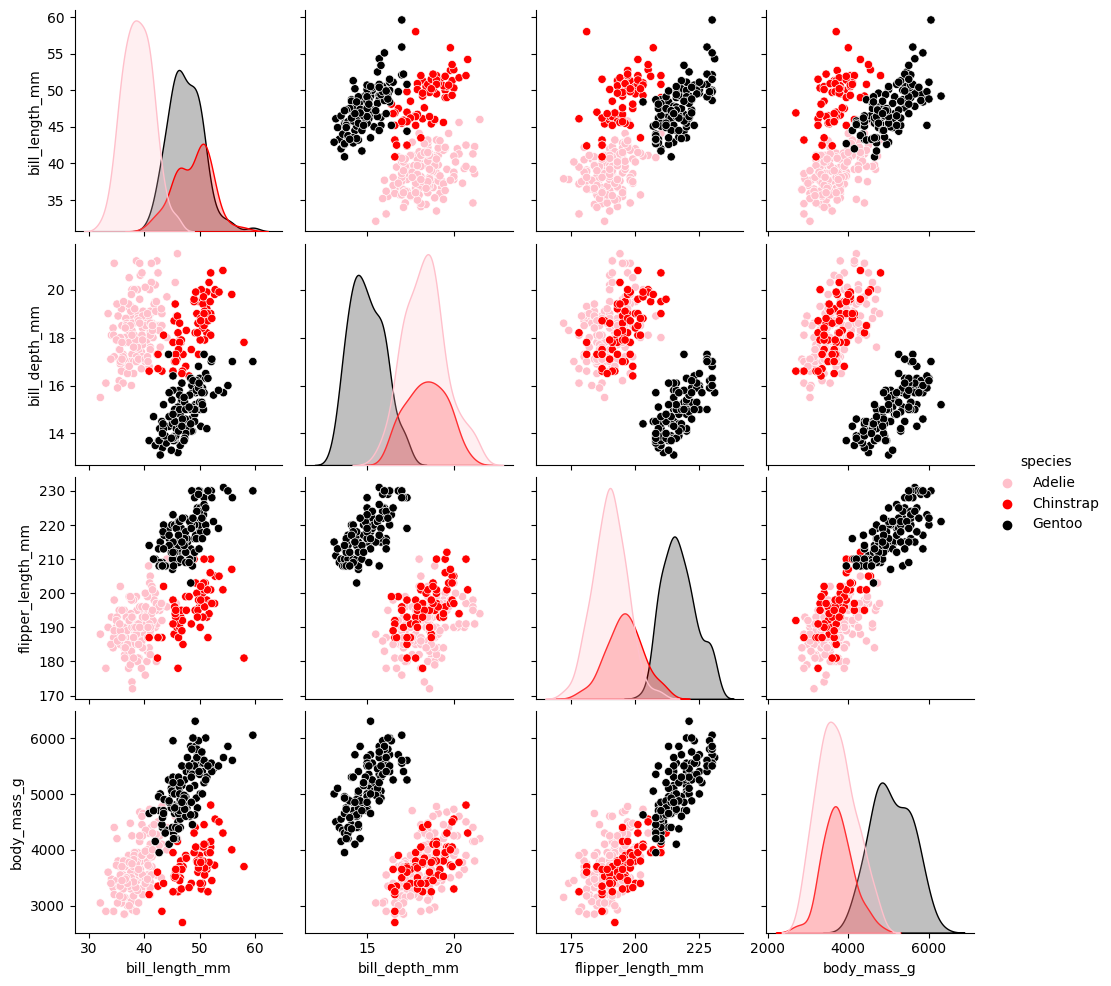

In [49]:
sns.pairplot(data=penguins, vars=penguins.columns[2:6], hue='species', palette=palette1)

<ipython-input-137-c2bf622edb86>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=penguins.corr()


[Text(0, 0.5, 'bill_length_mm'),
 Text(0, 1.5, 'bill_depth_mm'),
 Text(0, 2.5, 'flipper_length_mm'),
 Text(0, 3.5, 'body_mass_g')]

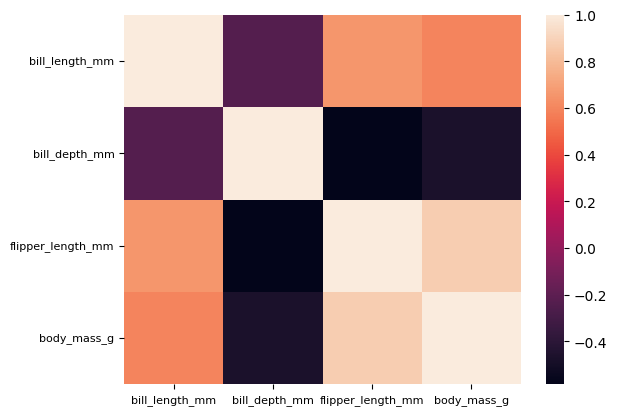

In [50]:
cor=penguins.corr()
hm_penguins=sns.heatmap(cor)
hm_penguins.set_xticklabels(hm_penguins.get_xticklabels(), rotation=0)
hm_penguins.set_xticklabels(hm_penguins.get_xticklabels(), fontsize=8)
hm_penguins.set_yticklabels(hm_penguins.get_yticklabels(), fontsize=8)

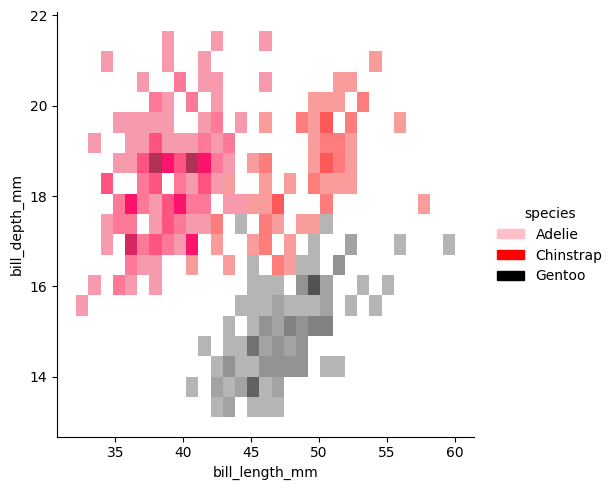

In [51]:
sns.displot(data=penguins, x='bill_length_mm', y='bill_depth_mm', binwidth=(0.9, 0.45), hue='species', palette=palette1)

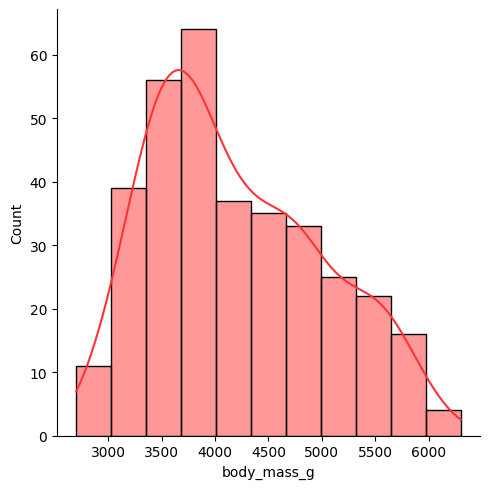

In [52]:
sns.displot(data=penguins,x='body_mass_g', color='#FF3333',kde=True)

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [73]:
penguins_clean = penguins.dropna()

In [74]:
features_pen = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target_pen = 'species'
X_pen = penguins_clean[features_pen]
y_pen = penguins_clean[target_pen]

In [75]:
X_pen_train, X_pen_test, y_pen_train, y_pen_test = train_test_split(X_pen, y_pen, test_size=0.2, random_state=42)

In [83]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_pen_train, y_pen_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

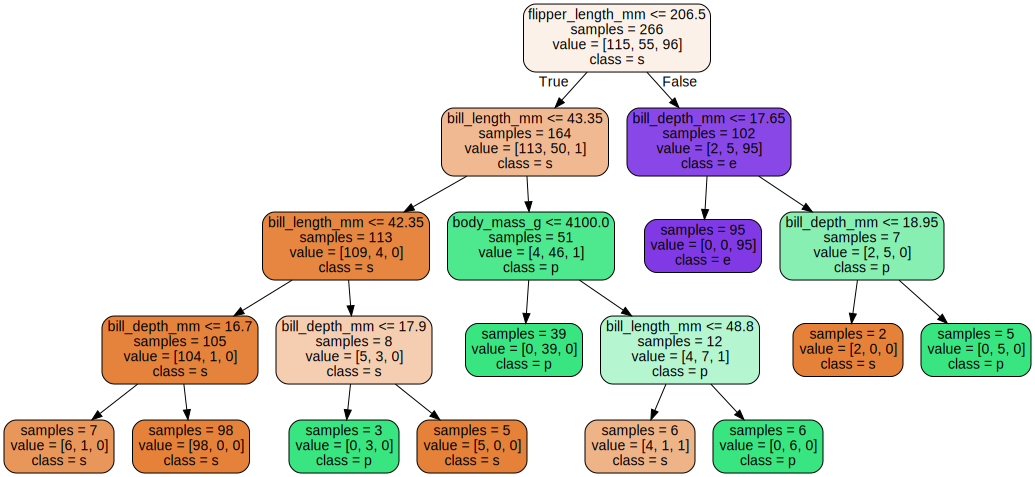

In [90]:
from graphviz import Source
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='penguins.dot', feature_names=features_pen, class_names=target_pen, impurity=False,
                filled=True, rounded=True)
Source.from_file('penguins.dot')

In [85]:
y_pen_pred = model.predict(X_pen_test)

In [87]:
accuracy_pen = accuracy_score(y_pen_test, y_pen_pred)
print(f"Accuracy: {accuracy_pen}")

Accuracy: 0.9850746268656716
